# **CSCI 485 Assignment #2: PCA and Dimensionality Reduction**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## **Data Preprocessing**
---

The dataset below includes the wine quality of red and white wine based on physicochemical tests. It has many features related to the chemical properties of wine, with the target variable being the `wine_type` (red or white). After reading in the dataset and printing its information, `red_wine_df.isnull().values.any()` is used to identify any missing data before conducting further analysis.

In [68]:
red_wine_df = pd.read_csv("winequality-red.csv", sep=";")
white_wine_df = pd.read_csv("winequality-white.csv", sep=";")

red_wine_df["wine_type"] = "red"
white_wine_df["wine_type"] = "white"

wine_df = pd.concat([red_wine_df, white_wine_df], ignore_index=True)

print(wine_df.info())
display(wine_df)
print(wine_df.isnull().values.any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


False


Before continuing, the data must be normalized to ensure that each feature is on the same scale. Since PCA identifies principal components based on variance and t-SNE performs distance calculations, features in their original scale can disproportionately influence the results if they have larger values. Therefore, by normalizing all features to the same scale, each feature can be accurately compared against the others.

In [69]:
X = wine_df.drop(["wine_type"], axis=1)  
y = wine_df["wine_type"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## **Dimensionality Reduction & Visualization**
---

The code below applies PCA to reduce the dataset to 3 principal components. By reducing the overall dimensions of the data to 3D, the output displays how much each principal component is able to explain the total variance of the data. The results include:

* PCA 1 explains 25.35%
* PCA 2 explains 22.08%
* PCA 3 explains 13.68%

The overall sum of the explained variance is about 61.11%, meaning that these three components captures 61.11% of the data's variance.

In [70]:
# Apply PCA to reduce to 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
explained_variance_3d = pca.explained_variance_ratio_

print("Explained variance by 3D principal component:")
print(explained_variance_3d)
print(explained_variance_3d.sum())

Explained variance by 3D principal component:
[0.25346226 0.22082117 0.13679223]
0.6110756621838704


Below are 3D and 2D PCA visualizations that can be used to visually analyze how the wines are clustered or spread out based on their quality.

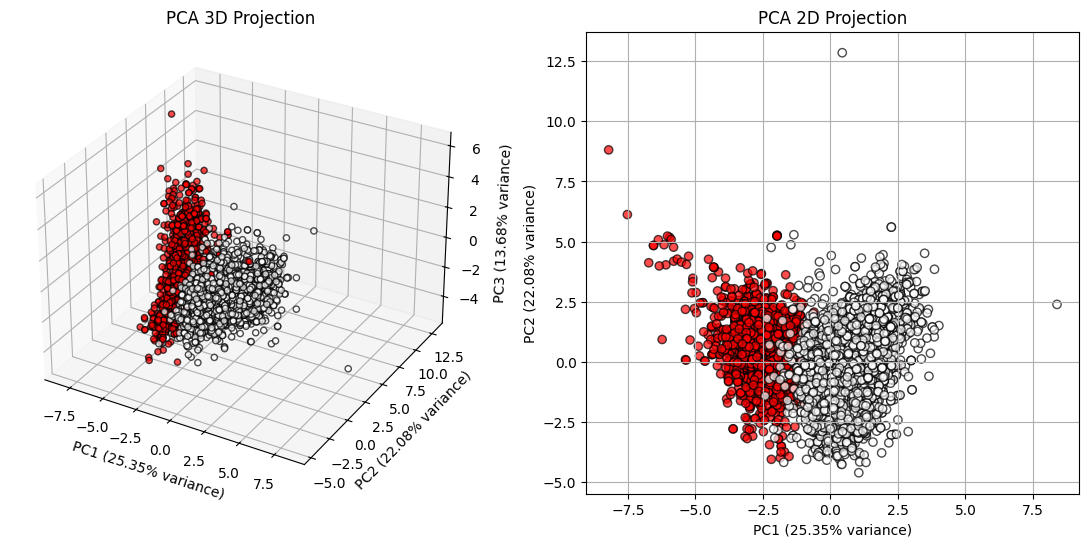

In [78]:
fig = plt.figure(figsize=(14, 6))

# Visualize the PCA-transformed 3D data
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y, alpha=0.7, edgecolors='k')
plt.title('PCA 3D Projection')
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax1.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%} variance)')

# Visualize the PCA-transformed 3D data
ax2 = fig.add_subplot(122)
scatter_2d = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.7, edgecolors='k')
ax2.set_title('PCA 2D Projection')
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid()



By printing out the Principal Components (Feature Loadings) of each dimension, we can explain which features have a positive or negative correlation with the principal component and by how much. Given the results below:

* PC1 has a positive correlation with the features ["citric acid", "residual sugar", "free sulfur dioxide", "total sulfur dioxide", "quality"].
* PC2 has a positive correlation with all features **except** for ["pH", "alcohol", "quality"].
* PC3 has a positive correlation with the features ["fixed acidity", "citric acid", "chlorides", "sulphates", "alcohol", "quality"].


In [73]:
# Print PCA components and explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Principal Components (Feature Loadings):")
for i, component in enumerate(pca.components_):
    print(f"PC{i+1}: {component.round(2)}")

Explained Variance Ratio: [0.25346226 0.22082117 0.13679223]
Principal Components (Feature Loadings):
PC1: [-0.26 -0.39  0.15  0.32 -0.31  0.42  0.47 -0.09 -0.21 -0.3  -0.06  0.09]
PC2: [ 0.26  0.11  0.14  0.34  0.27  0.11  0.14  0.55 -0.15  0.12 -0.49 -0.3 ]
PC3: [ 0.47 -0.28  0.59 -0.08  0.05 -0.1  -0.1  -0.05 -0.41  0.17  0.21  0.3 ]


Overall, dimensionality reduction has many useful traits that allow us to identify trends and patterns within our data. It makes it easier to visualize and interpret in a 2D or 3D spectrum, which helps clusters or patterns be spotted more easily. Additionally, by reducing the overall data to only a few dimensions, it makes further computations, especially with machine learning models, faster since we are now focusing on the more important components.

However, there is a trade-off to keep in mind when performing dimensionality reduction as information loss comes from it. By reducing dimensions, information about the data is removed, which could have a significant impact on explaining its variance. That’s why it’s important to note the explained variance ratio of the principal components to understand how much your current components are explaining the overall variance of your data.

## **Comparison with t-SNE**
---

t-SNE is a non-linear dimensionality reduction technique that focuses on preserving the local structure in high-dimensional data while reducing the dimensions. This is different from PCA, which is a linear technique that preserves the global structure and captures the most variance. PCA is faster to compute, given that it calculates the eigenvalue decomposition, whereas t-SNE is slower because it requires iterative optimization.

The code below visualizes the same data in a 2D space. The left figure applies t-SNE on the raw scaled data, while the right figure applies PCA reduction first before performing t-SNE. By applying PCA first, it helps t-SNE eliminate noise and less relevant features.

Text(0, 0.5, 't-SNE Component 2')

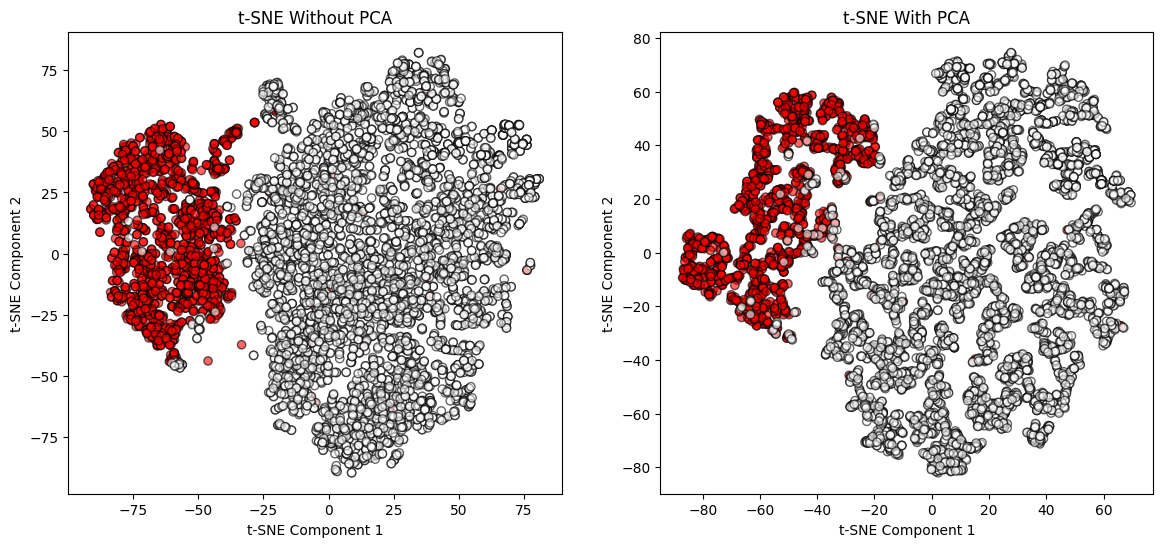

In [ ]:
# 2D t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne_no_pca = tsne.fit_transform(X_scaled)
X_tsne_pca = tsne.fit_transform(X_pca)

# Plot the results side by side
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# t-SNE without PCA
ax[0].scatter(X_tsne_no_pca[:, 0], X_tsne_no_pca[:, 1], c=y, alpha=0.6, edgecolors='k')
ax[0].set_title("t-SNE Without PCA")
ax[0].set_xlabel("t-SNE Component 1")
ax[0].set_ylabel("t-SNE Component 2")

# t-SNE with PCA
scatter = ax[1].scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1], c=y, alpha=0.6, edgecolors='k')
ax[1].set_title("t-SNE With PCA")
ax[1].set_xlabel("t-SNE Component 1")
ax[1].set_ylabel("t-SNE Component 2")


The resulting figure is similar to PCA in that both visually represent the two different clusters of wine types. However, t-SNE provides better clustering within its neighbors. The 2D PCA figure from the previous section shows overlap between the two clusters, whereas t-SNE is able to focus on local structure allowing for better differentiate between them. As a result, there is barely any overlap between the data points compared to using PCA alone.

By applying PCA before t-SNE, the noise within the dataset was reduced, making the main clusters more distinct and well-defined.

Overall, PCA provides a good summary of the global structure when performing dimensionality reduction and has a fast computation rate. Although t-SNE is more computationally expensive, it focuses on maintaining local relationships and distances, resulting in more well-defined clusters. However, both techniques can be used together to leverage the strengths of each, PCA for reducing noise and preserving variance, and t-SNE for capturing local structure and improving cluster separation.